In [213]:
import pandas as pd
import numpy as np


from tensorflow.keras.callbacks import EarlyStopping
from pandas_profiling import ProfileReport

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score

In [214]:
df = pd.read_csv('/content/drive/MyDrive/HALLIBURTON AI - ML CHALLENGE/data/LUCAS_Topsoil_2015.csv')

In [215]:
df.head()

,Point_ID,Revisited_point,Coarse,Clay,Sand,Silt,pH(CaCl2),pH(H2O),EC,OC,...,Elevation,LC1,LU1,Soil_Stones,NUTS_0,NUTS_1,NUTS_2,NUTS_3,LC1_Desc,LU1_Desc
0,34103754,No,NaN,NaN,NaN,NaN,3.9,3.91,44.20,25.5,...,158,H11,U420,1,UK,UKM,UKM8,UKM81,Inland marshes,Semi-natural and natural areas not in use
1,34443774,No,NaN,NaN,NaN,NaN,3.1,3.91,46.40,503.5,...,500,H12,U420,1,UK,UKM,UKM7,UKM77,Peatbogs,Semi-natural and natural areas not in use
2,35163814,No,NaN,NaN,NaN,NaN,4.9,5.48,15.85,51.4,...,404,H11,U420,1,UK,UKM,UKM7,UKM71,Inland marshes,Semi-natural and natural areas not in use
3,32323656,No,NaN,NaN,NaN,NaN,3.0,3.76,26.90,470.3,...,364,H12,U150,1,UK,UKN,UKN1,UKN10,Peatbogs,OTHER PRIMARY PRODUCTION
4,34463934,No,28.0,10.0,46.0,44.0,3.9,4.04,28.40,43.1,...,315,D20,U111,2,UK,UKM,UKM6,UKM61,Shrubland without tree cover,Agriculture (excluding fallow land and kitchen...


In [216]:
df = df.dropna()

In [217]:
df['Revisited_point'] = df['Revisited_point'].replace(['Yes'],'1')
df['Revisited_point'] = df['Revisited_point'].replace(['No'],'0')

In [218]:
df = df[['Revisited_point', 'Coarse','Sand', 'Silt',
       'pH(CaCl2)', 'pH(H2O)', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'Elevation','Clay']]

In [219]:
X = df[['Revisited_point', 'Coarse','Sand', 'Silt',
       'pH(CaCl2)', 'pH(H2O)', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'Elevation']]

In [220]:
y = df['Clay']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [222]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [223]:
model = Sequential()
model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_47 (Dense)             (None, 2670)              24030     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 2671      
Total params: 26,813
Trainable params: 26,813
Non-trainable params: 0
_________________________________________________________________


In [224]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [225]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [226]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2,callbacks = callback)


Epoch 1/50
256/256 [==============================] - 1s 3ms/step - loss: 186.4918 - mse: 186.4918 - mae: 9.5055 - val_loss: 119.4750 - val_mse: 119.4750 - val_mae: 8.2948
Epoch 2/50
256/256 [==============================] - 1s 3ms/step - loss: 85.1572 - mse: 85.1572 - mae: 6.7170 - val_loss: 49.4754 - val_mse: 49.4754 - val_mae: 5.0886
Epoch 3/50
256/256 [==============================] - 1s 3ms/step - loss: 64.4436 - mse: 64.4436 - mae: 5.6163 - val_loss: 57.8032 - val_mse: 57.8032 - val_mae: 5.3040
Epoch 4/50
256/256 [==============================] - 1s 3ms/step - loss: 45.3966 - mse: 45.3966 - mae: 4.8560 - val_loss: 37.2057 - val_mse: 37.2057 - val_mae: 4.5195
Epoch 5/50
256/256 [==============================] - 1s 3ms/step - loss: 52.8667 - mse: 52.8667 - mae: 4.8347 - val_loss: 32.8505 - val_mse: 32.8505 - val_mae: 4.2688
Epoch 6/50
256/256 [==============================] - 1s 3ms/step - loss: 43.1362 - mse: 43.1362 - mae: 4.4753 - val_loss: 35.4281 - val_mse: 35.4281 - val_

In [227]:
y_pred = model.predict(X_test)

In [228]:
accuracy = r2_score(y_test,y_pred)
accuracy

0.9932982650592042

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


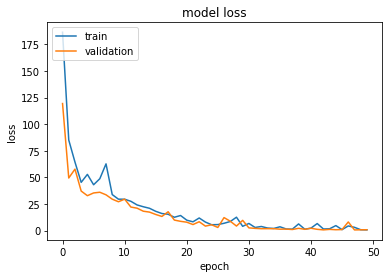

In [229]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()